Find the markdown blocks that say interaction required! The notebook should take care of the rest!

# Import libs

In [1]:
import sys
import os
sys.path.append('..')
from eflow.foundation import DataPipeline,DataFrameTypes
from eflow.model_analysis import ClassificationAnalysis
from eflow.utils.modeling_utils import optimize_model_grid
from eflow.utils.eflow_utils import get_type_holder_from_pipeline, remove_unconnected_pipeline_segments
from eflow.utils.pandas_utils import data_types_table
from eflow.auto_modeler import AutoCluster
from eflow.data_pipeline_segments import DataEncoder

import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import copy
import pickle
import time
import math
import multiprocessing as mp
from functools import partial
from scipy import stats
from IPython.display import clear_output

In [2]:
# # Additional add ons
# !pip install pandasgui
# !pip install pivottablejs
# clear_output()

In [3]:
%matplotlib notebook
%matplotlib inline

## Declare Project Variables

### Interaction required

In [4]:
dataset_path = "Datasets/titanic_train.csv"

# -----
dataset_name = "Titanic Data"
pipeline_name = "Titanic Pipeline"

# -----


# -----
notebook_mode = True

## Clean out segment space

In [5]:
remove_unconnected_pipeline_segments()

# Import dataset

In [6]:
df = pd.read_csv(dataset_path)
shape_df = pd.DataFrame.from_dict({'Rows': [df.shape[0]],
                                   'Columns': [df.shape[1]]})
display(shape_df)
display(df.head(30))

,Rows,Columns
0,891,12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
data_types_table(df)

,Data Types
Features,
Age,float64
Fare,float64
PassengerId,int64
Survived,int64
Pclass,int64
SibSp,int64
Parch,int64
Name,object
Sex,object


# Loading and init df_features

In [8]:
# Option: 1
# df_features = get_type_holder_from_pipeline(pipeline_name)

In [9]:
# Option: 2
df_features = DataFrameTypes()
df_features.init_on_json_file(os.getcwd() + f"/eflow Data/{dataset_name}/df_features.json")

In [10]:
df_features.display_features(display_dataframes=True,
                             notebook_mode=notebook_mode)

,Data Types
Features,
Sex,string
Embarked,string
Cabin,string
Pclass,string
Survived,bool
SibSp,integer
Parch,integer
Fare,float
Age,float


# Any extra processing before eflow DataPipeline

# Setup pipeline structure

### Interaction Required

In [11]:
main_pipe = DataPipeline(pipeline_name,
                         df,
                         df_features)

The file 'root_pipeline.json' exist!
Now configuring object with proper pipeline segments...
Removing the feature: "PassengerId"
Removing the feature: "Name"
Removing the feature: "Ticket"


In [12]:
main_pipe.perform_pipeline(df,
                           df_features)

In [13]:
df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Sex_female,Sex_male
0,0,22.000000,1,0,7.2500,False,False,True,False,False,True,False,True
1,1,38.000000,1,0,71.2833,True,False,False,True,False,False,True,False
2,1,26.000000,0,0,7.9250,False,False,True,False,False,True,True,False
3,1,35.000000,1,0,53.1000,True,False,False,False,False,True,True,False
4,0,35.000000,0,0,8.0500,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,False,True,False,False,False,True,False,True
887,1,19.000000,0,0,30.0000,True,False,False,False,False,True,True,False
888,0,28.312774,1,2,23.4500,False,False,True,False,False,True,True,False
889,1,26.000000,0,0,30.0000,True,False,False,True,False,False,False,True


In [14]:
qualitative_features = list(df_features.get_dummy_encoded_features().keys())

# Generate clustering models with automodeler (and find any other models in the directory structure)


Inspecting scaled results!


,Mean,Standard Dev
Survived,3.987333e-17,1.0
Age,-4.944293e-16,1.0
SibSp,4.386066e-17,1.0
Parch,5.382900e-17,1.0
Fare,3.987333e-18,1.0
Pclass_1,-7.575933e-17,1.0
Pclass_2,1.993666e-17,1.0
Pclass_3,-6.778466e-17,1.0
Embarked_Cherbourg,-1.993666e-17,1.0
Embarked_Queenstown,0.000000e+00,1.0


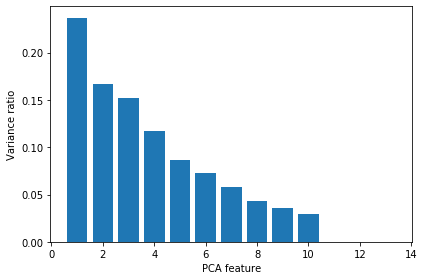

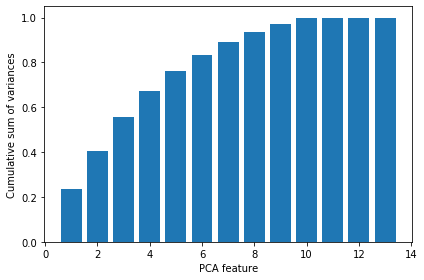


Inspecting applied scaler and pca results!


,Mean,Standard Dev
PCA_Feature_1,-1.594933e-17,1.755623e+00
PCA_Feature_2,-7.177199e-17,1.473689e+00
PCA_Feature_3,-3.189866e-17,1.404598e+00
PCA_Feature_4,-3.588600e-17,1.236644e+00
PCA_Feature_5,-2.791133e-17,1.062925e+00
PCA_Feature_6,-5.980999e-18,9.733969e-01
PCA_Feature_7,4.386066e-17,8.676079e-01
PCA_Feature_8,1.594933e-17,7.507034e-01
PCA_Feature_9,6.180366e-17,6.864172e-01
PCA_Feature_10,-6.977833e-17,6.156816e-01


After applying pca with a cutoff percentage 0.8% for the cumulative index. Using features 1 to 6
Old shape (891, 13)
New shape (891, 6)

Inspecting data after final scaler applied!


,Mean,Standard Dev
PCA_Feature_1,-3.987333e-18,1.0
PCA_Feature_2,-1.594933e-17,1.0
PCA_Feature_3,-4.984166e-18,1.0
PCA_Feature_4,-1.395567e-17,1.0
PCA_Feature_5,-3.987333e-18,1.0
PCA_Feature_6,5.980999e-18,1.0


Found past models in directory structure! Attempting to re-initalize models...
Fuzzy C-Means_Clusters=7 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/Fuzzy C-Means/Clusters=7/Fuzzy C-Means_Clusters=7.pkl

Fuzzy C-Means_Clusters=5 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/Fuzzy C-Means/Clusters=5/Fuzzy C-Means_Clusters=5.pkl

Fuzzy C-Means_Clusters=6 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/Fuzzy C-Means/Clusters=6/Fuzzy C-Means_Clusters=6.pkl

K-Means_Clusters=7 was found at /Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlow/testing/eflow Data/Titanic Data/Auto Clustering/Models/K-Means/Cl

In [15]:
auto_cluster = AutoCluster(df,
                           project_sub_dir=dataset_name,
                           overwrite_full_path=None,
                           notebook_mode=True,
                           pca_perc=.8)

# Inspect Hierarchical models

In [16]:
# auto_cluster.visualize_hierarchical_clustering()

K-Medians Elbow Seq Count 10: 100%|██████████| 11/11 [00:00<00:00, 11.85it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1317: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  inertias_matrix = np.matrix([inertias[i]])
../eflow/auto_modeler/cluster_master.py:1318: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  elbow_inertias_matrix = np.matrix(inertias[i][elbow_cluster - 2:elbow_cluster + 1])


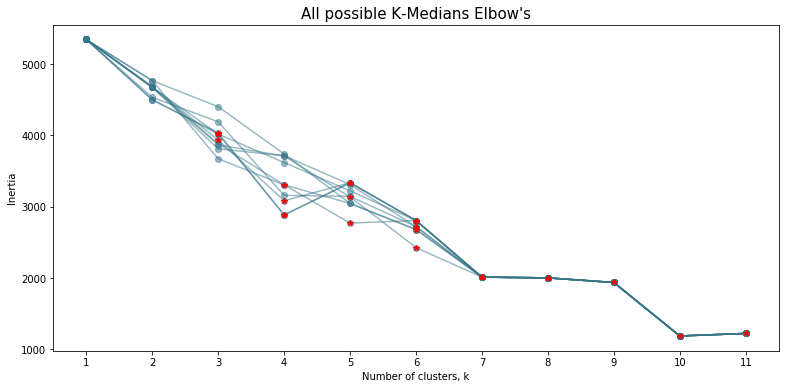

[5345.999999999996, 4673.696624227614, 3868.153703040824, 3713.1647291166983, 3138.084768851749, 2428.5899962806493, 2014.5453123462937, 2003.767425273727, 1939.0594338434253, 1189.3868282888945, 1224.9253303064186]


../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  all_dps = np.matrix([self.__scaled[i] for i in cluster_indexes])
../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  all_dps = np.matrix([self.__scaled[i] for i in cluster_indexes])
../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular nd

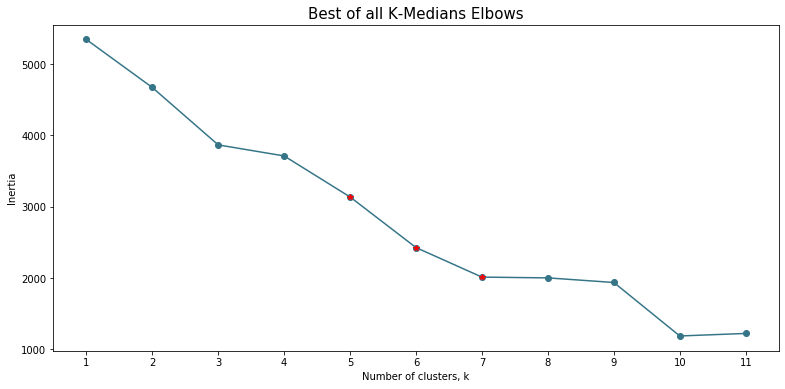

,Proximity Elbow,Counts
0,6,6
1,7,5
5,5,5
2,8,4
4,4,4
3,3,3
6,9,1
7,10,1
8,11,1


,Main Elbows,Counts
0,7,4
1,4,3
2,5,1
3,6,1
4,10,1


K-Means Elbow Seq Count 10: 100%|██████████| 11/11 [00:00<00:00, 17.30it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1317: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  inertias_matrix = np.matrix([inertias[i]])
../eflow/auto_modeler/cluster_master.py:1318: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  elbow_inertias_matrix = np.matrix(inertias[i][elbow_cluster - 2:elbow_cluster + 1])


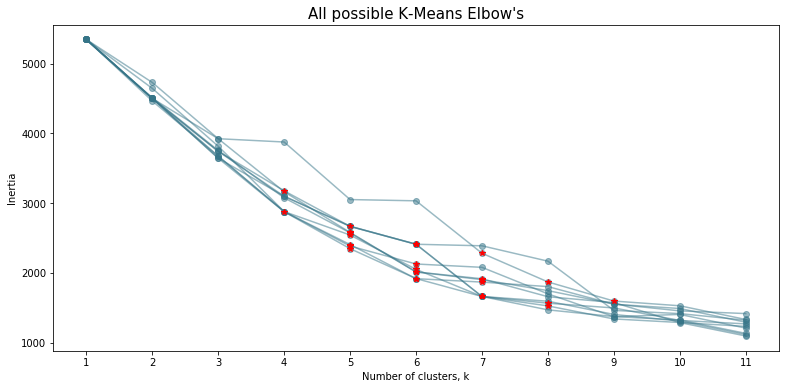

[5345.999999999996, 4511.185076077373, 3755.68960274773, 3077.428692511271, 2574.668699623521, 2014.4678983950032, 1903.4497534142347, 1746.3506109939447, 1554.2335294515547, 1456.2799920370687, 1417.429145110282]


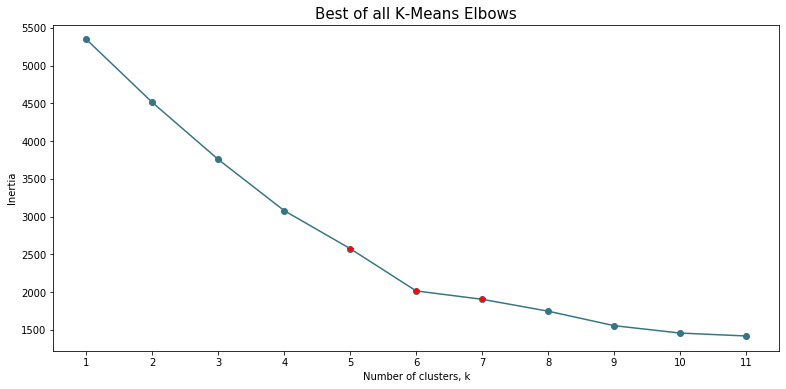

,Proximity Elbow,Counts
2,6,9
3,7,8
1,5,7
4,8,3
0,4,2
5,9,1


,Main Elbows,Counts
2,6,5
0,5,2
1,7,2
3,8,1


Fuzzy C-Means Elbow Seq Count 10: 100%|██████████| 11/11 [00:00<00:00, 11.51it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1317: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  inertias_matrix = np.matrix([inertias[i]])
../eflow/auto_modeler/cluster_master.py:1318: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  elbow_inertias_matrix = np.matrix(inertias[i][elbow_cluster - 2:elbow_cluster + 1])


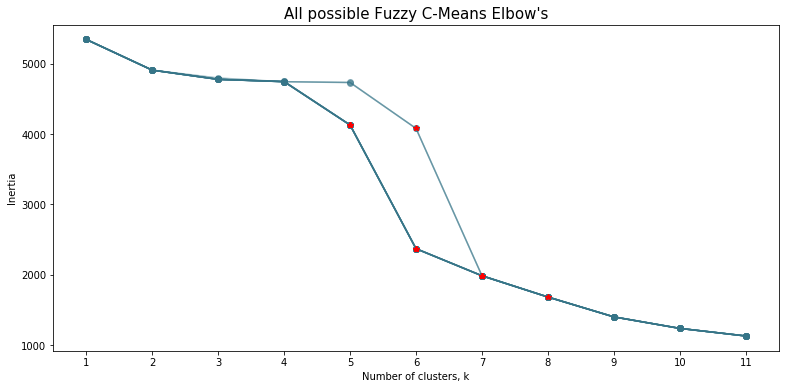

[5345.999999999996, 4910.030455091571, 4778.23371061994, 4745.940188073309, 4129.482140450524, 2371.081276090588, 1985.9894627564358, 1683.6842207926986, 1401.4090593157669, 1237.7644835798546, 1129.9284793236557]


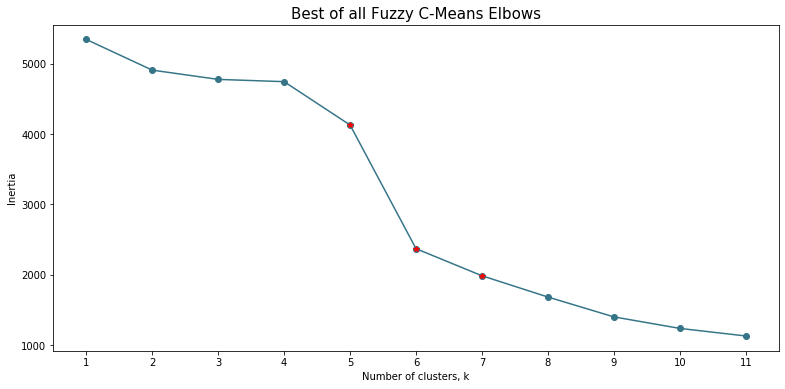

,Proximity Elbow,Counts
1,6,10
2,7,10
0,5,8
3,8,2


,Main Elbows,Counts
0,6,8
1,7,2


Cure Elbow Seq Count 1:   0%|          | 0/11 [00:00<?, ?it/s, model_count=1]../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  all_dps = np.matrix([self.__scaled[i] for i in cluster_indexes])
Cure Elbow Seq Count 1: 100%|██████████| 11/11 [00:01<00:00,  9.55it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1317: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  inertias_matrix = np.matrix([inertias[i]])
../eflow/auto_modeler/cluster_master.py:1318: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices

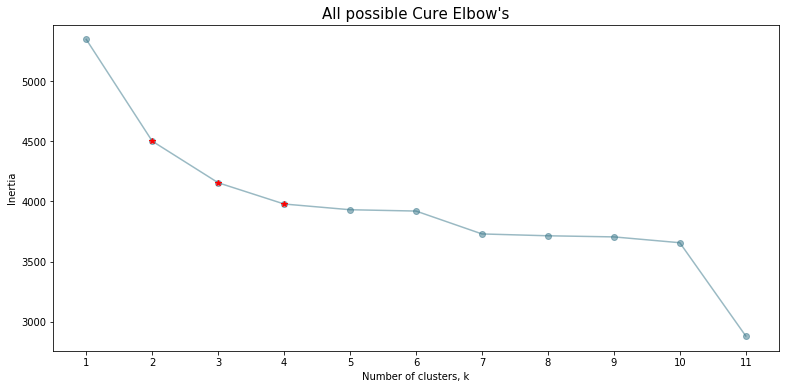

[5345.999999999996, 4501.091589836301, 4155.5767308676395, 3978.984955755752, 3931.4652223446183, 3920.4942373284757, 3730.357059730127, 3715.0919218096747, 3705.809207545254, 3657.4383838151193, 2882.6649067349017]


../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  all_dps = np.matrix([self.__scaled[i] for i in cluster_indexes])
../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  all_dps = np.matrix([self.__scaled[i] for i in cluster_indexes])
../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular nd

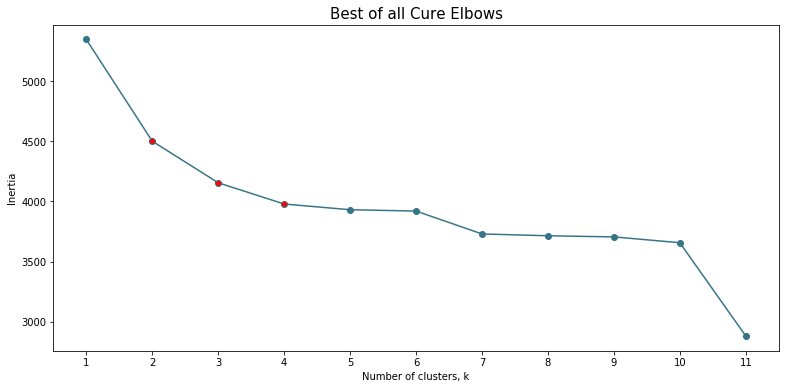

,Proximity Elbow,Counts
0,2,1
1,3,1
2,4,1


,Main Elbows,Counts
0,3,1


K-Medoids Elbow Seq Count 1:   0%|          | 0/11 [00:00<?, ?it/s, model_count=1]../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  all_dps = np.matrix([self.__scaled[i] for i in cluster_indexes])
K-Medoids Elbow Seq Count 10: 100%|██████████| 11/11 [00:00<00:00, 15.01it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1317: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  inertias_matrix = np.matrix([inertias[i]])
../eflow/auto_modeler/cluster_master.py:1318: PendingDeprecationWarning: the matrix subclass is not the recommended way to represe

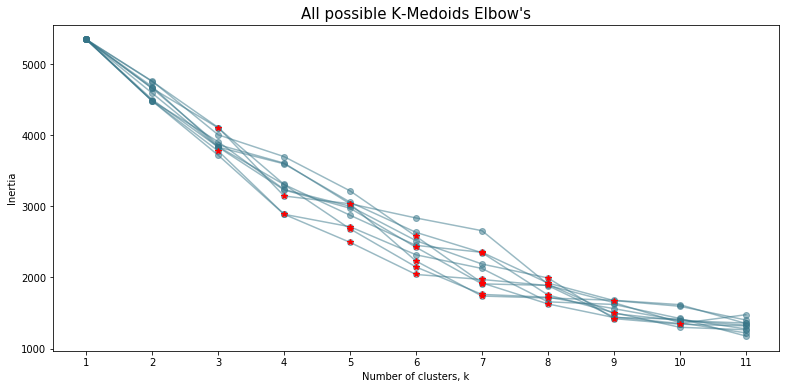

[5345.999999999996, 4682.248709641738, 3839.5346844802225, 3305.7809789265207, 2682.680306602815, 2147.121648385858, 1761.661644539937, 1721.9410581062928, 1561.7455314744223, 1393.5720915434667, 1358.2670341511775]
Something went wrong when trying to save the model: K-Medoids
Something went wrong when trying to save the model: K-Medoids
Something went wrong when trying to save the model: K-Medoids


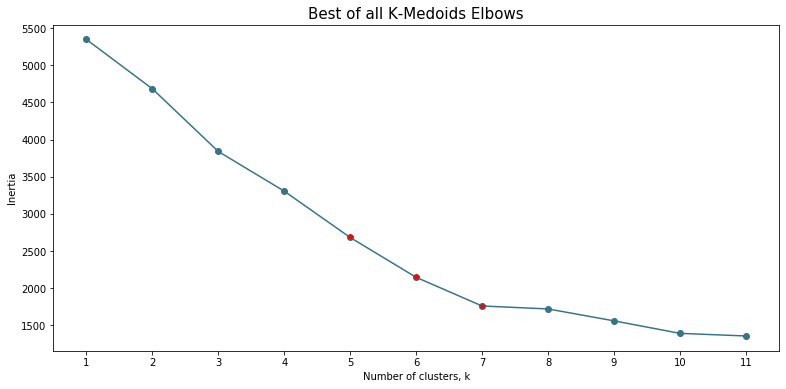

,Proximity Elbow,Counts
0,7,7
1,8,6
3,6,5
4,5,4
2,9,3
5,3,2
6,4,2
7,10,1


,Main Elbows,Counts
1,7,3
0,8,2
2,6,2
3,4,2
4,9,1


Somsc Elbow Seq Count 1:   0%|          | 0/11 [00:00<?, ?it/s, model_count=1]../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  all_dps = np.matrix([self.__scaled[i] for i in cluster_indexes])
Somsc Elbow Seq Count 1: 100%|██████████| 11/11 [00:00<00:00, 14.34it/s, model_count=11]
../eflow/auto_modeler/cluster_master.py:1317: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  inertias_matrix = np.matrix([inertias[i]])
../eflow/auto_modeler/cluster_master.py:1318: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matric

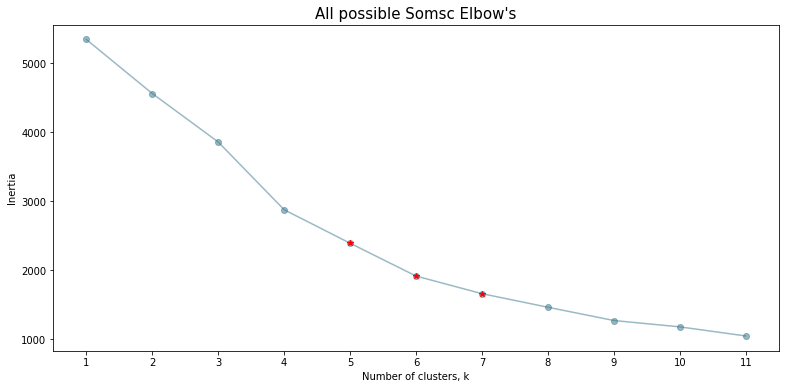

[5345.999999999996, 4563.181329613961, 3861.254277611249, 2879.4968249039216, 2394.1768828967092, 1918.7671435874695, 1663.0697560096817, 1466.634694966624, 1274.3341892725111, 1182.4562764068662, 1050.3844206890615]


../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  all_dps = np.matrix([self.__scaled[i] for i in cluster_indexes])
../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  all_dps = np.matrix([self.__scaled[i] for i in cluster_indexes])
../eflow/auto_modeler/cluster_master.py:1151: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular nd

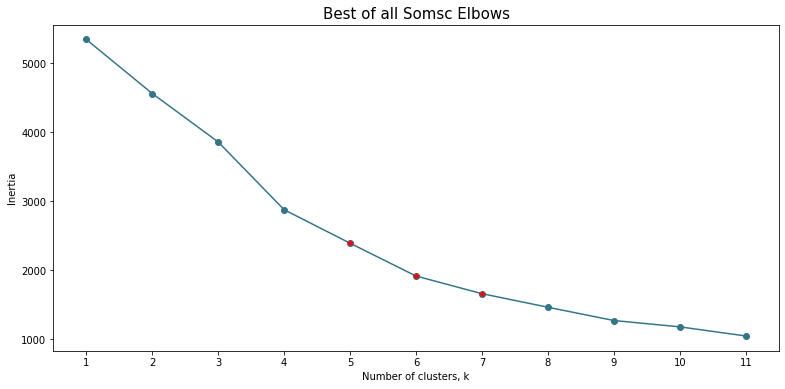

,Proximity Elbow,Counts
0,5,1
1,6,1
2,7,1


,Main Elbows,Counts
0,6,1


[5, 6, 7]

In [17]:
auto_cluster.create_elbow_models(sequences=10,
                                 max_k_value=11,
                                 display_visuals=True)

## Remove Scaled data to save space(not needed but it helps)

In [18]:
1/0

ZeroDivisionError: division by zero

In [ ]:
auto_cluster.delete_scaled_data()

In [ ]:
auto_cluster.evaluate_all_models(df=df,
                                 df_features=df_features,
                                 qualitative_features=qualitative_features,
                                 zscore=[1.5,None])

In [ ]:
# auto_cluster.evaluate_model(model_name="Somsc_Clusters=5",
#                             df=df,
#                             df_features=df_features,
#                             qualitative_features=qualitative_features,
#                             zscore=[1.5,None])

In [ ]:
matrix = auto_cluster.get_scaled_data()

In [ ]:
for i in range(1,891):
    a = np.sum(((np.absolute(matrix.min(axis=0)) + matrix[i]) / (matrix.max(axis=0) + np.absolute(matrix.min(axis=0)))) * (360/len(matrix[0])))
    print(a)